In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Regression Algorithms 
## Random Forest Regression

In [2]:
## Download Data
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'bol1Dataset2Operation.csv')
print(file_path)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\bol1Dataset2Operation.csv


In [29]:
Bolt1OperationDF = pd.read_csv(file_path)

In [30]:
Bolt1OperationDF.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,turbine_bearing_vib_vrt,lower_bearing_vib_vrt,Bolt_1_Tensile,Bolt_1_Torsion
0,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,NaN,NaN,1598.481390,175.758460
1,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,NaN,NaN,1598.477449,175.755164
2,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,NaN,NaN,1598.479316,175.764601
3,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,NaN,NaN,1598.490184,175.763157
4,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,NaN,NaN,1598.494073,175.760959


In [31]:
dfColumns = Bolt1OperationDF.columns
data = []
for x in dfColumns:
    if x!= "Bolt_1_Tensile":
        data.append(Bolt1OperationDF[x])
time = np.linspace(0,Bolt1OperationDF.shape[0],Bolt1OperationDF.shape[0],dtype='int')


## Scale


In [32]:
scaledData = []

In [36]:
scaler = StandardScaler()
scaler.fit(data)
scaledData = scaler.transform(data)
 


In [37]:
scaledData[0][0:100]

array([-0.33727528, -0.33737077, -0.33746738, -0.33756301, -0.33760644,
       -0.33759598, -0.33758656, -0.33757783, -0.33756842, -0.33759383,
       -0.33765699, -0.33771943, -0.33778163, -0.33784431, -0.33784448,
       -0.33776718, -0.33768987, -0.33761223, -0.33753459, -0.33747972,
       -0.33744709, -0.33741381, -0.3373821 , -0.33734994, -0.33738085,
       -0.33749987, -0.33761916, -0.33773897, -0.33785821, -0.33789928,
       -0.33782583, -0.33775179, -0.33767816, -0.33760448, -0.33754203,
       -0.33749346, -0.33744436, -0.33739529, -0.33734687, -0.33732432,
       -0.33734208, -0.33736055, -0.33737955, -0.33739779, -0.3374342 ,
       -0.33750698, -0.3375804 , -0.33765365, -0.33772736, -0.33777026,
       -0.33775146, -0.3377303 , -0.33770957, -0.33768906, -0.33768133,
       -0.33770192, -0.33772319, -0.33774509, -0.33776736, -0.33779123,
       -0.33782125, -0.33785176, -0.33788316, -0.33791395, -0.33791631,
       -0.33786208, -0.33780613, -0.33775043, -0.33769494, -0.33

In [28]:
len(scaledData[9])

1744780

ValueError: x and y must be the same size

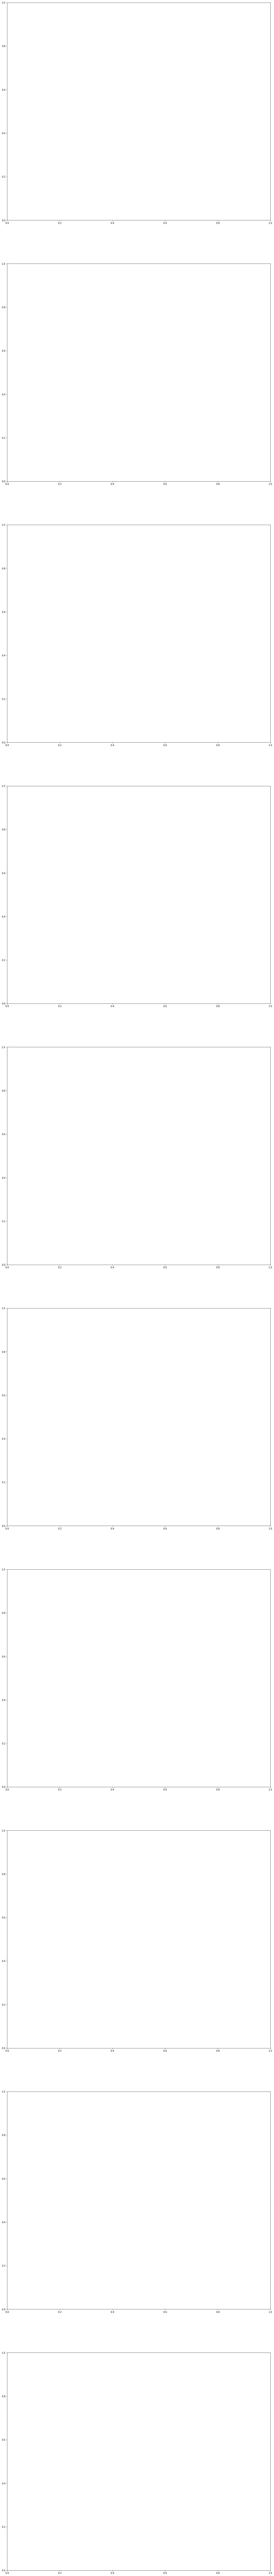

In [16]:
fig, axs = plt.subplots(len(scaledData), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time, scaledData[i], marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

In [ ]:
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.predict([[0, 0, 0, 0]])